**Библиотеки Python для DS (семинары)**
Урок 4. Практическая работа. Построение модели бинарной классификации

Используя diabetes-dataset, выполните следующие шаги:

1.   Предварительная обработка данных:

— Очистите данные от пропусков (если они есть), обработайте аномалии и нормализуйте данные, если это необходимо.

 — Разделите датасет на обучающую и тестовую выборки.
2.   Построение модели:

— Используя алгоритм логистической регрессии, постройте модель бинарной классификации для предсказания наличия диабета у пациентов.

— Обучите модель на обучающем наборе данных.
3.  Оценка модели:

— Вычислите и проанализируйте метрики точности (accuracy), точности (precision), полноты (recall) и F1-меру для обученной модели на тестовых данных.



In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import os

# Проверяем список файлов
print(os.listdir())

['.config', 'diabetes-dataset.csv', 'sample_data']


In [3]:
# Загрузка данных
file_path ='diabetes-dataset.csv'
data = pd.read_csv(file_path)
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


Этот фрейм данных содержит следующие столбцы:

1.   Pregnancies: Number of times pregnant (Количество беременостей у одной женщины)
2.   Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test (Концентрация глюкозы в плазме крови через 2 часа при пероральном тесте на толерантность к глюкозе)
3. BloodPressure: Diastolic blood pressure (Диастолическое кровяное давление) (mm Hg)
4. SkinThickness: Triceps skin fold thickness (Толщина кожной складки трицепса) (mm)
5. Insulin: 2-Hour serum insulin (2-часовой прием сывороточного инсулина) (mu U/ml)
6. BMI: Body mass index (Индекс массы тела) (weight in kg/(height in m)^2)
7. DiabetesPedigreeFunction: Diabetes pedigree function (Наследственная функция диабета)
8. Age: Age (Возвраст) (years)
9. Outcome: Class variable (Class variable) (0 or 1)






In [26]:
# 1. Предварительная обработка данных
data.shape


(2000, 9)

In [17]:
data.describe().T


,count,mean,std,min,25%,50%,75%,max
Pregnancies,2000.0,3.70350,3.306063,0.000,1.000,3.000,6.000,17.00
Glucose,2000.0,121.18250,32.068636,0.000,99.000,117.000,141.000,199.00
BloodPressure,2000.0,69.14550,19.188315,0.000,63.500,72.000,80.000,122.00
SkinThickness,2000.0,20.93500,16.103243,0.000,0.000,23.000,32.000,110.00
Insulin,2000.0,80.25400,111.180534,0.000,0.000,40.000,130.000,744.00
BMI,2000.0,32.19300,8.149901,0.000,27.375,32.300,36.800,80.60
DiabetesPedigreeFunction,2000.0,0.47093,0.323553,0.078,0.244,0.376,0.624,2.42
Age,2000.0,33.09050,11.786423,21.000,24.000,29.000,40.000,81.00
Outcome,2000.0,0.34200,0.474498,0.000,0.000,0.000,1.000,1.00


На основе представленных статистических данных неприрывных признаков можно сделать следующие выводы:

Pregnancies: Number of times pregnant (Количество беременостей у одной женщины):
* Средний количество беременостей у одной женщины на уровне 3.00
* Миниманая 0.00
* Максимальная 17.00
* Медиана равна 3.74
* Отклонение состовляет 3.3

Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test (Концентрация глюкозы в плазме крови через 2 часа при пероральном тесте на толерантность к глюкозе):
* Средняя концентрация глюцозы на уровне 117.00
* Миниманая 0.00
* Максимальная 199.00
* Медиана равна 121.18
* Отклонение состовляет 32.06

BloodPressure: Diastolic blood pressure (Диастолическое кровяное давление) (mm Hg):
Средние диастолическое кровяное давление на уровне 72.00
* Миниманая 0.00
* Максимальная 122.00
* Медиана равна 69.14
* Отклонение состовляет 19.18

SkinThickness: Triceps skin fold thickness (Толщина кожной складки трицепса) (mm):
* Средние толщина кожной складки трицепса на уровне 23.00
* Миниманая 0.00
* Максимальная 110.00
* Медиана равна 20.93
* Отклонение состовляет 16.10

Insulin: 2-Hour serum insulin (2-часовой прием сывороточного инсулина) (mu U/ml):
* Средние 2 часовой приём сыровоточного инсулина на уровне 30.50
* Миниманая 0.00
* Максимальная 744.00
* Медиана равна 80.25
* Отклонение состовляет 111.18

BMI: Body mass index (Индекс массы тела) (weight in kg/(height in m)^2):
* Средние индекс массы тела на уровне 32.00
* Миниманая 0.00
* Максимальная 80.60
* Медиана равна 32.19
* Отклонение состовляет 8.14

DiabetesPedigreeFunction: Diabetes pedigree function (Наследственная функция диабета):
* Средние наследственная функция диабета на уровне 0.37
* Миниманая 0.07
* Максимальная 2.42
* Медиана равна 0.47
* Отклонение состовляет 0.32

Age: Age (Возвраст) (years):
* Средний возвраст на уровне 29.00
* Миниманая 21.00
* Максимальная 81.00
* Медиана равна 33.09
* Отклонение состовляет 11.78

In [5]:
data.isnull().sum()


,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [6]:
data.dtypes

,0
Pregnancies,int64
Glucose,int64
BloodPressure,int64
SkinThickness,int64
Insulin,int64
BMI,float64
DiabetesPedigreeFunction,float64
Age,int64
Outcome,int64


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


Из общей информации следует:
*   DataFrame содержит 2000 записей (от индекса 0 до 1999)
*   Всего 9 колонок
* Нулевые значения отсуствуют
* Нет пропущеных записей в колонках
* Три колонки Pregnancies, Age и Outcome в int64значениях остальные в float64

In [8]:
# Удаление пропусков (если есть)
data.dropna(inplace=True)

In [9]:
# Проверка и обработка аномалий
# Пример: если столбцы содержат явно некорректные значения (например, 0 в невозможных местах)
for col in ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]:
    data[col] = data[col].replace(0, np.nan)
    data[col].fillna(data[col].median(), inplace=True)

<ipython-input-9-1f42dffaf566>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].median(), inplace=True)


In [9]:
# Нормализация данных
scaler = StandardScaler()
X = data.drop(columns="Outcome")  # Признаки
y = data["Outcome"]  # Целевая переменная
X_scaled = scaler.fit_transform(X)

In [10]:
# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

<Axes: ylabel='Outcome'>

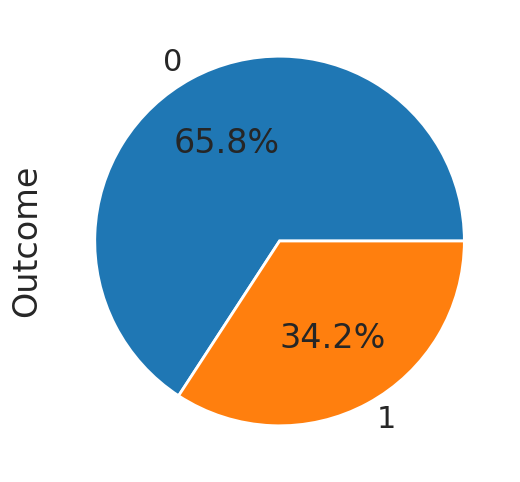

In [12]:
sns.set_style('darkgrid')
sns.set_context('poster')
plt.rcParams['figure.figsize'] = [8,6]
data.groupby('Outcome').size().plot(kind='pie',
    y = "Outcome",
    label = "Outcome",
    autopct='%1.1f%%')

Наблюдаем ситуацию небольшого дисбаланса классов, с долей 65.8% участников не больных диабетом и 34.2% с диабетом без указания типа. Данный набор имеет немного меньше представительсво одного класса по сравнению с другим.

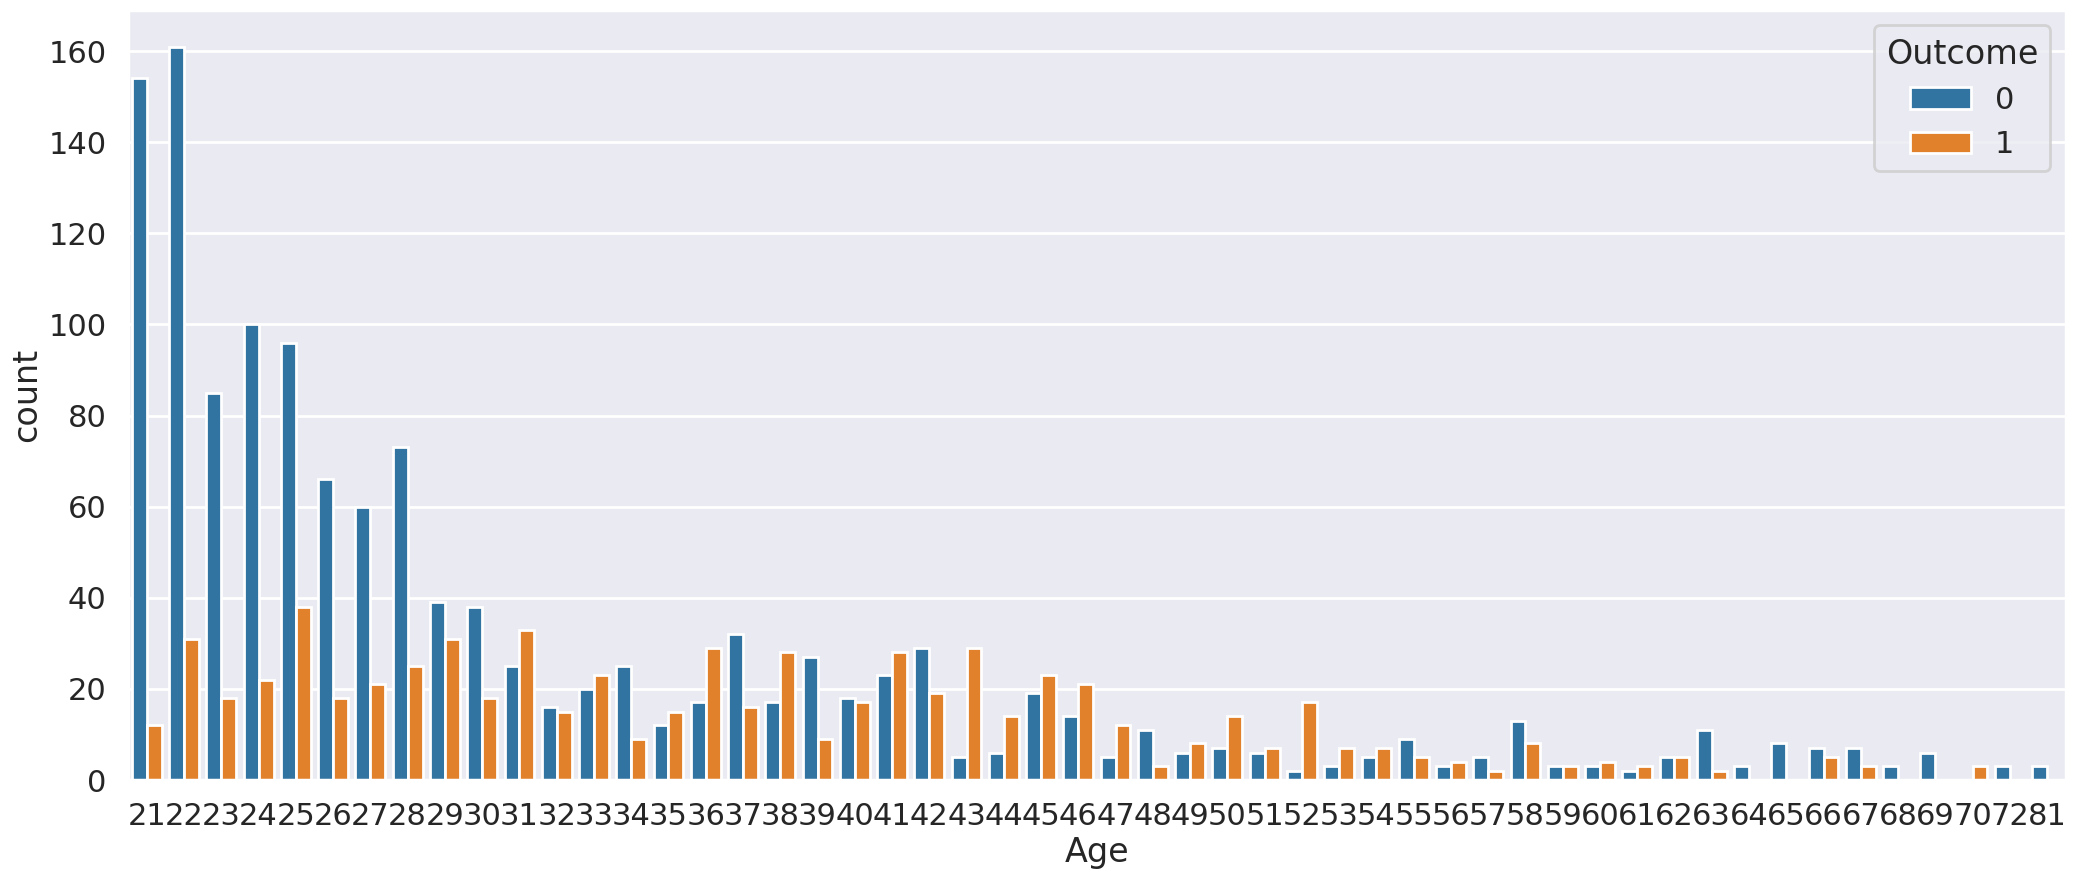

In [13]:
plt.figure(figsize=(25,10))
sns.countplot(x='Age',hue='Outcome',data=data)
plt.show()

Из графика видно что в возрасте от 21 до 28 больше всего здоровых людей. Количество больных диабетом более менее равномерно распределено от 22 до 46 года. Начиная с возраста в 47 лет не так много данных.

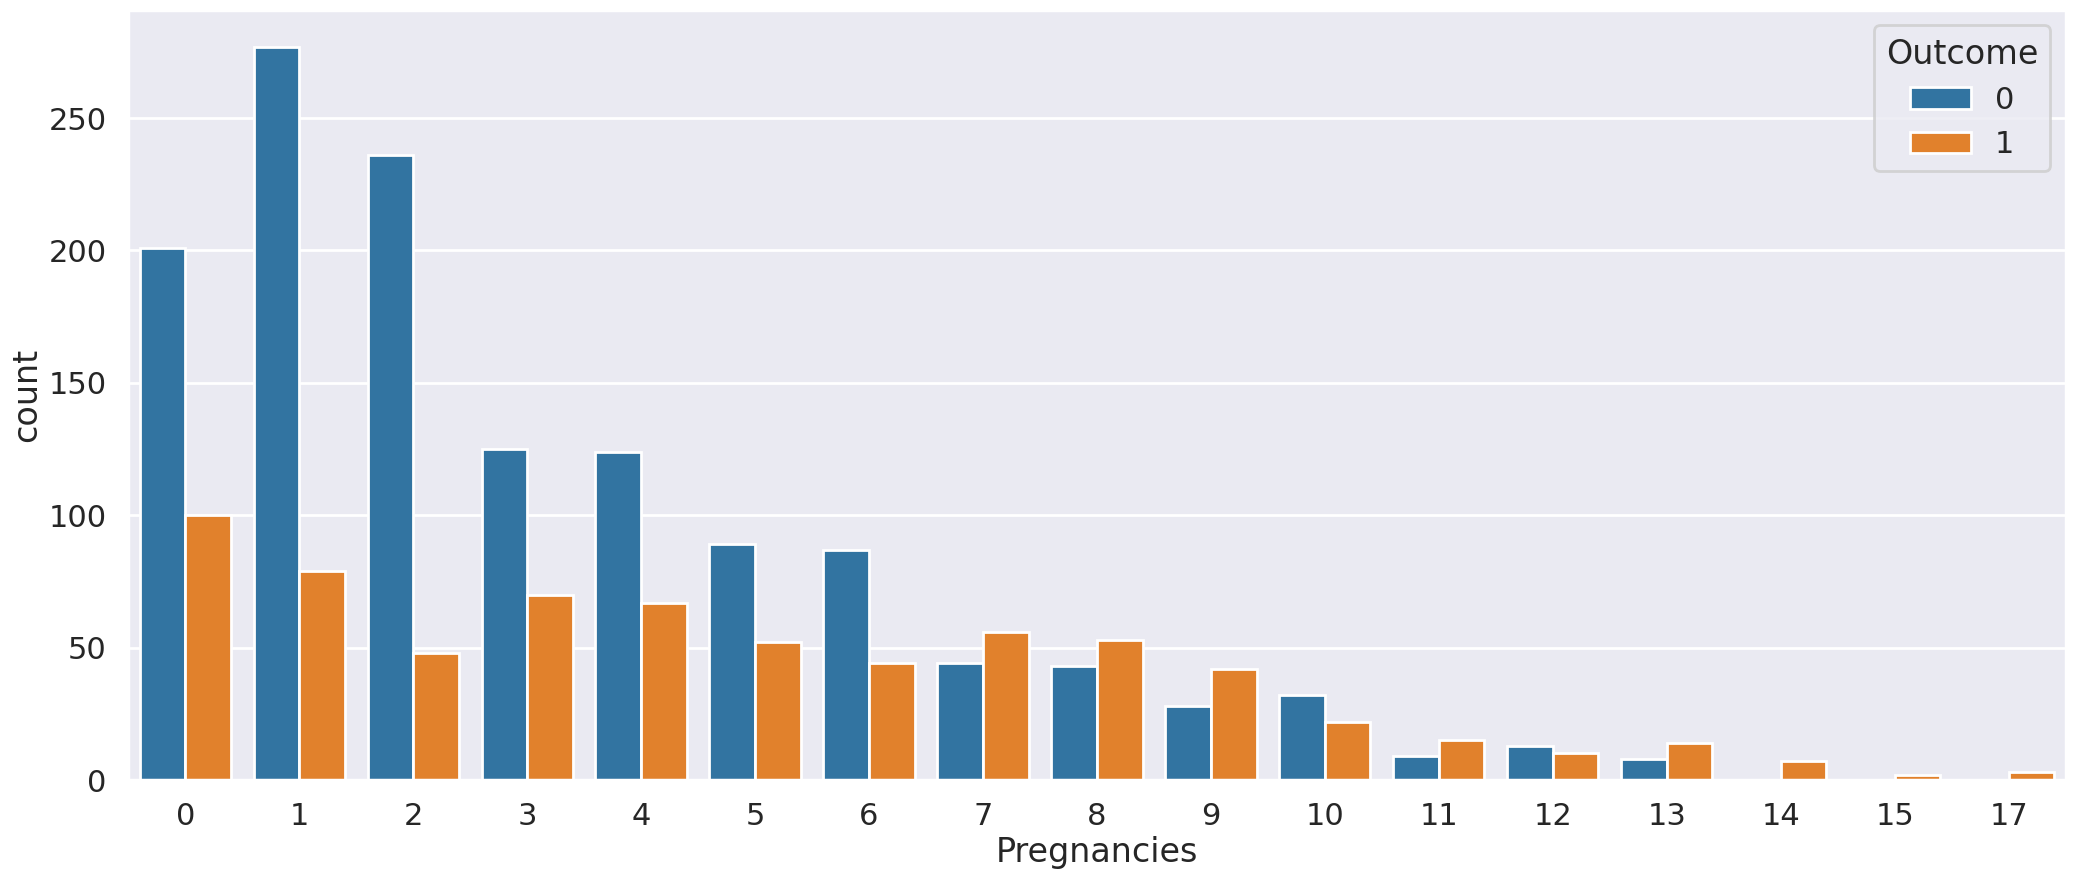

In [14]:
plt.figure(figsize=(25,10))
sns.countplot(x='Pregnancies',hue='Outcome',data=data)
plt.show()

Из графика видно, что количество здоровых уменьшается с 4 беременности что свидетельствует о недостаточности данных.

In [15]:
import altair as alt
sel = alt.selection_single(fields=["Outcome"])

c1= alt.Chart(data).mark_circle().encode(
    x="DiabetesPedigreeFunction",
    y="BMI",
    color=alt.Color('Outcome')
)
c1

alt.Chart(...)

Из графика видно, что люди с высоким увронем ожирения сильнее подвержаны деабету, однако также это могут быть выбросы или просто не достаток данных, так как основное количество сдоровых и больных людей находятся в рамках 25-45.

Основывась на графиках, мы можем составить общее представление о наборе данных. Количество здоровых женщин уменшается с каждой новой беременостью. Вес сильно не влияет на заболевание диабетом, а с возрастом люди сильнее позвержены заболеванию, но по графику не достаточно данных и нет явного повышения количества заболевания диабетом.

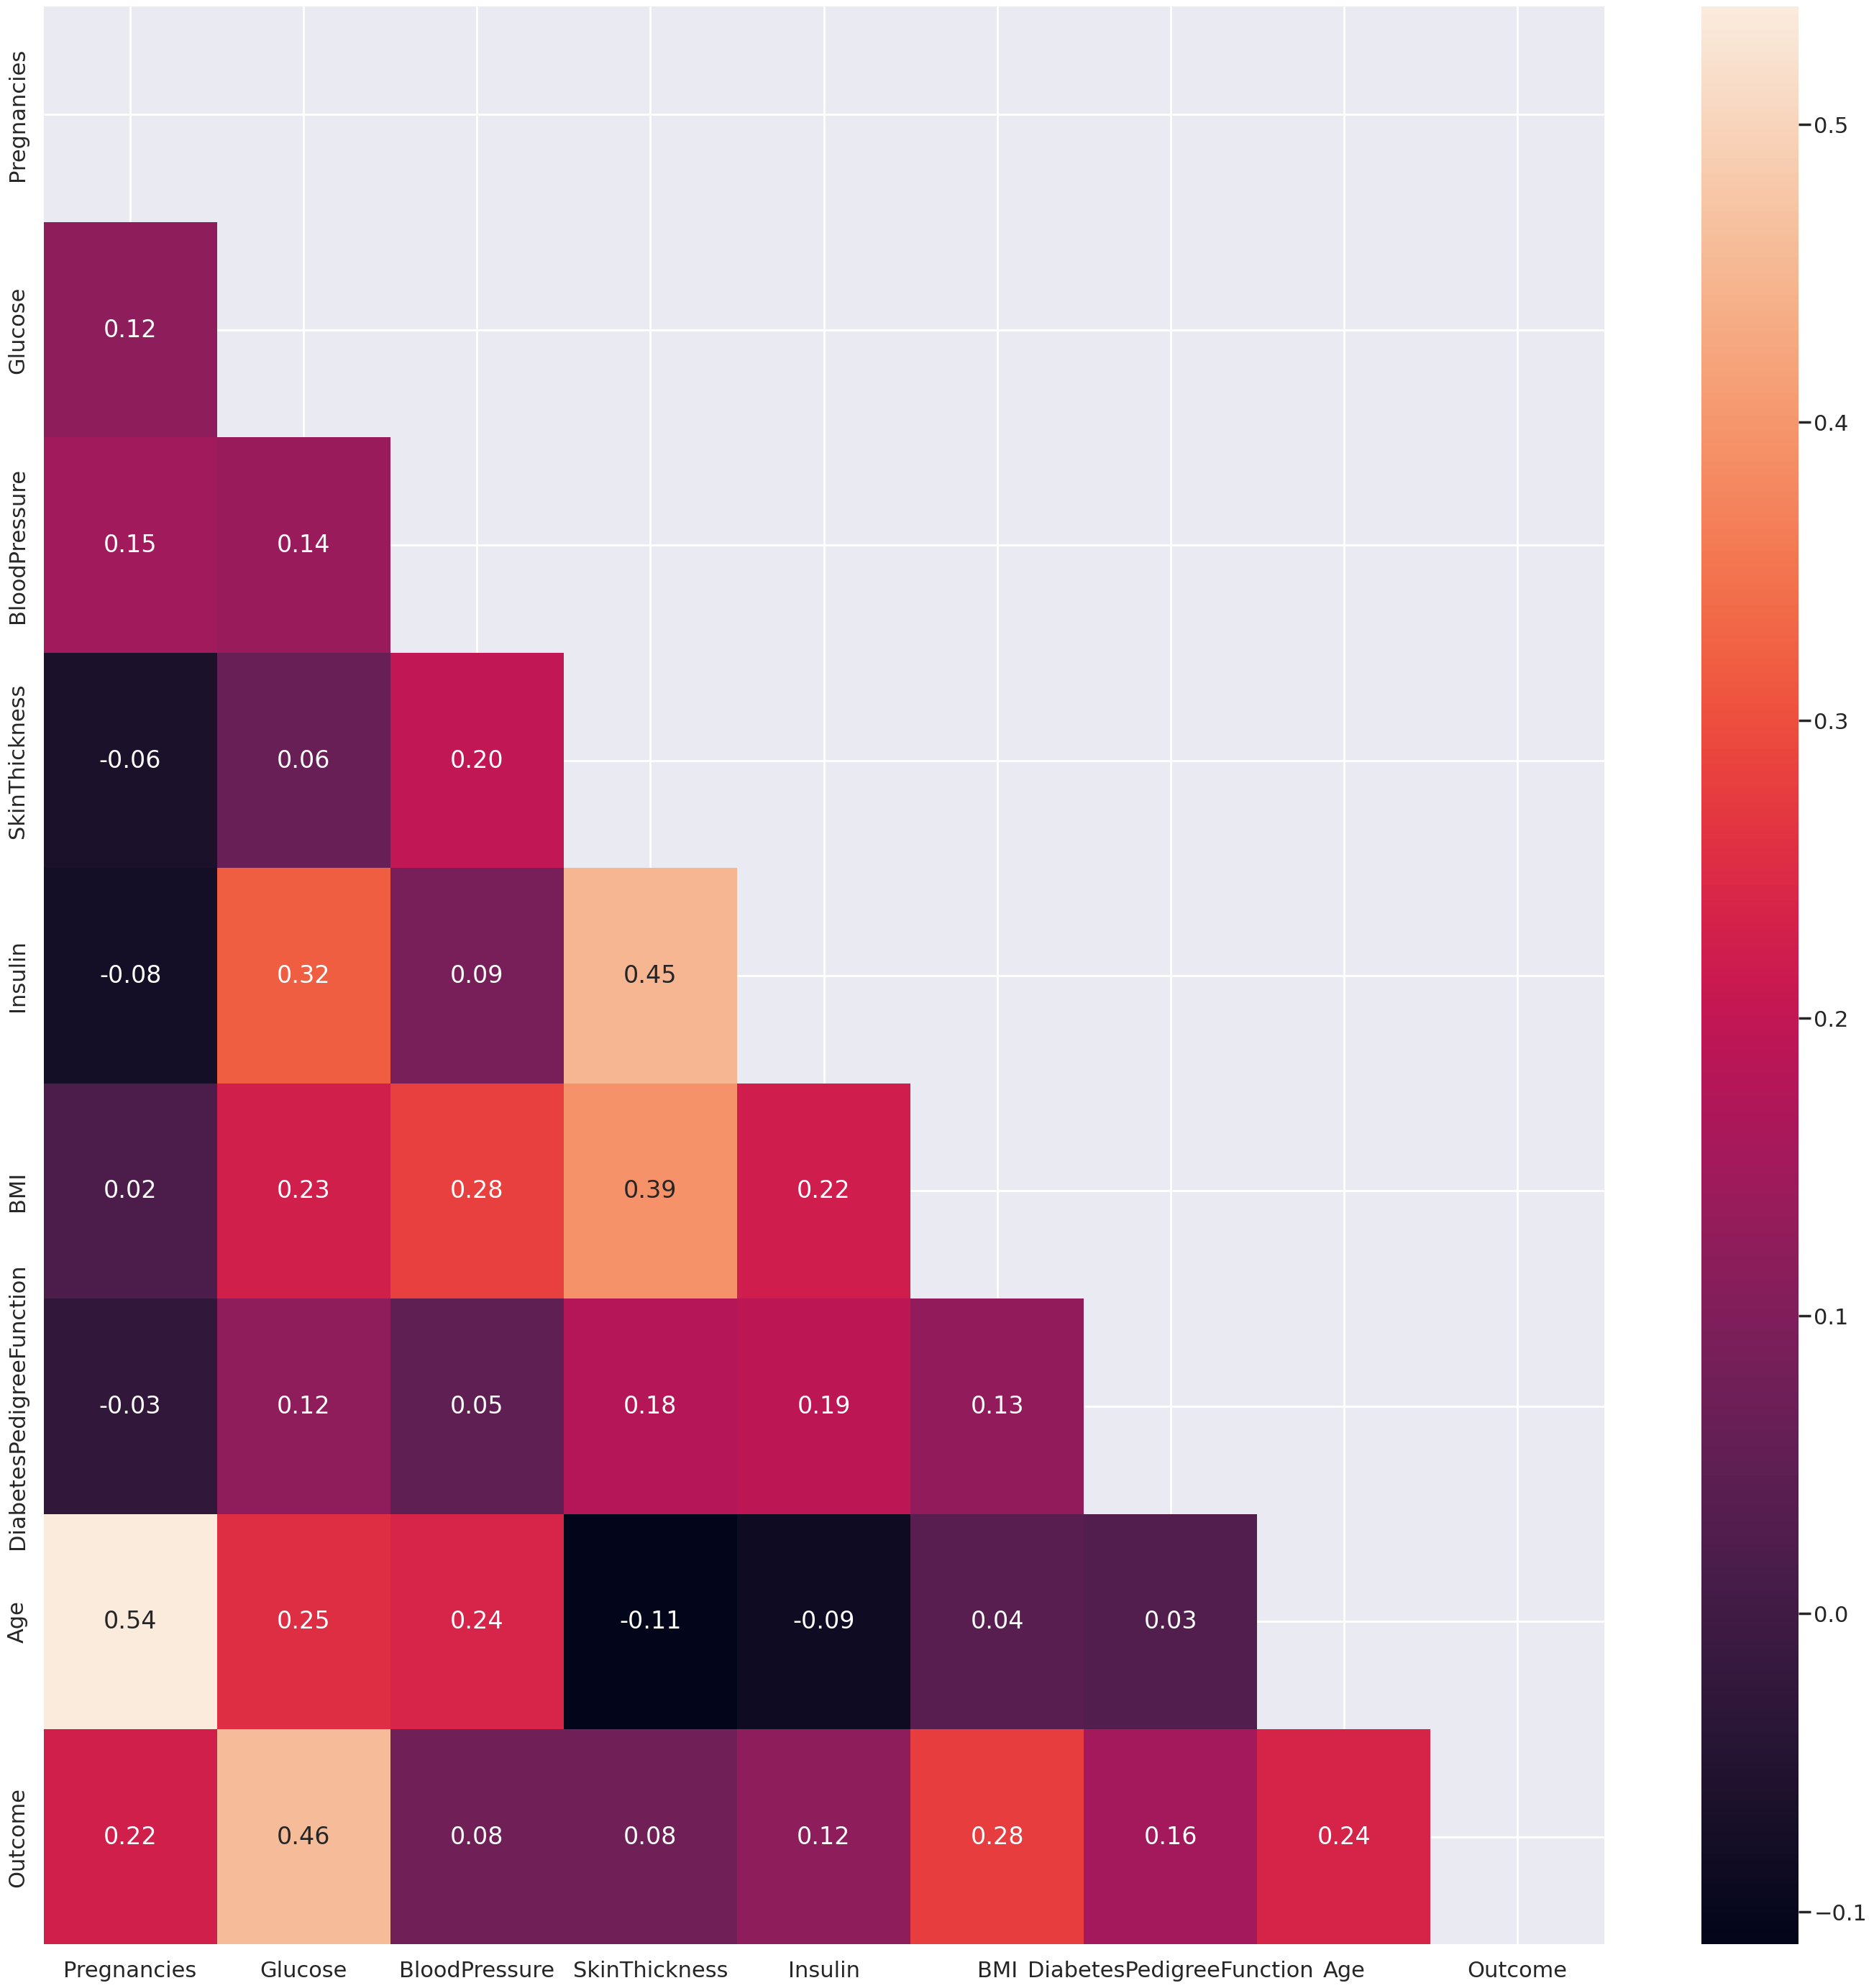

In [19]:
# Визуализация корреляции
plt.subplots(figsize=(35, 35))
mask = np.triu(np.ones_like(data.corr(), dtype=bool))
sns.heatmap(data.corr(), mask=mask, annot = True, fmt = ".2f")
plt.show()

* Сильная положительная корреляция (0.54) между 'Pregnacies' и 'Age'.
* Сильная положительная корреляция (0.46) между 'Glicose' и 'Outcome'.
* Сильная положительная корреляция (0.45) между 'SkinThickness' и 'Unsulin'.
* Сильная отрицательная корреляция (-0.11) между 'SkinThickness' и 'Age'.

**2. Построение модели:**

— Используя алгоритм логистической регрессии, постройте модель бинарной классификации для предсказания наличия диабета у пациентов.

— Обучите модель на обучающем наборе данных.

In [21]:
# 2. Построение модели
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train, y_train)
print("Размер обучающего набора:", X_train.shape)
print("Размер тестового набора:", X_test.shape)

Размер обучающего набора: (1600, 8)
Размер тестового набора: (400, 8)


In [20]:
# Создание и обучение модели
model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)

# Предсказание на тестовой выборке
predictions = model.predict(X_test)

# Оценка производительности модели
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.7625


**3. Оценка модели:**

— Вычислите и проанализируйте метрики точности (accuracy), точности (precision), полноты (recall) и F1-меру для обученной модели на тестовых данных.

In [13]:
# 3. Оценка модели
y_pred = model.predict(X_test)

In [14]:
# Метрики
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [15]:
print("\nОценка модели:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")


Оценка модели:
Accuracy: 0.80
Precision: 0.75
Recall: 0.61
F1-score: 0.67


Accuracy точность модели состовляет 0.80, модель правильно классифицировала примерно 80% данных.

Precision точность модели состовляет 0.75, только 75% являются положительными модель может делать достаточно много ложных данных.

Recall состовляет 0.61 это показывает что модель правильно индифицировала 61% данных.

F1 Score состовляет 0.67 даёт более менее сбалансированное представлени модели однако требует улучшений поскольку хороший вариант должен состовлять не ниже 0.80

Модель демонстрирует хороший уровень полноты, но относительно низкую точность. Это может быть приемлемо в некоторых сценариях, где важно выявить как можно больше положительных случаев, но требуется улучшение точности модели.

In [16]:
# Полный отчет
print("\nКлассификационный отчет:\n", classification_report(y_test, y_pred))


Классификационный отчет:
               precision    recall  f1-score   support

           0       0.81      0.90      0.85       263
           1       0.75      0.61      0.67       137

    accuracy                           0.80       400
   macro avg       0.78      0.75      0.76       400
weighted avg       0.79      0.80      0.79       400



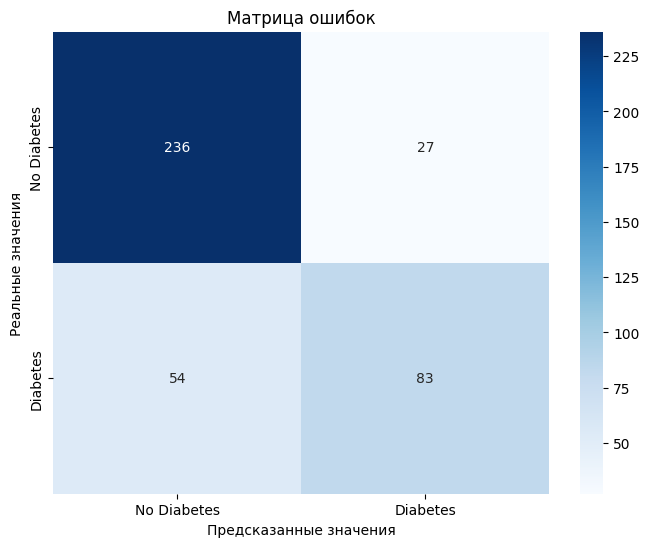

In [19]:
# Матрица ошибок
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=["No Diabetes", "Diabetes"], yticklabels=["No Diabetes", "Diabetes"])
plt.title("Матрица ошибок")
plt.xlabel("Предсказанные значения")
plt.ylabel("Реальные значения")
plt.show()